In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from ISLP.models import sklearn_sm


## Chapter 4: Questions 14 

In [3]:
# load Auto dataset
auto = pd.read_csv(r"D:\william\OneDrive - UW-Madison\UW-Madison\722\MachineLearning25\Auto.csv").dropna()
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
# a)
auto["mpg01"] = (auto["mpg"] > auto["mpg"].median()).astype(int)
auto["mpg01"].value_counts()

mpg01
0    196
1    196
Name: count, dtype: int64

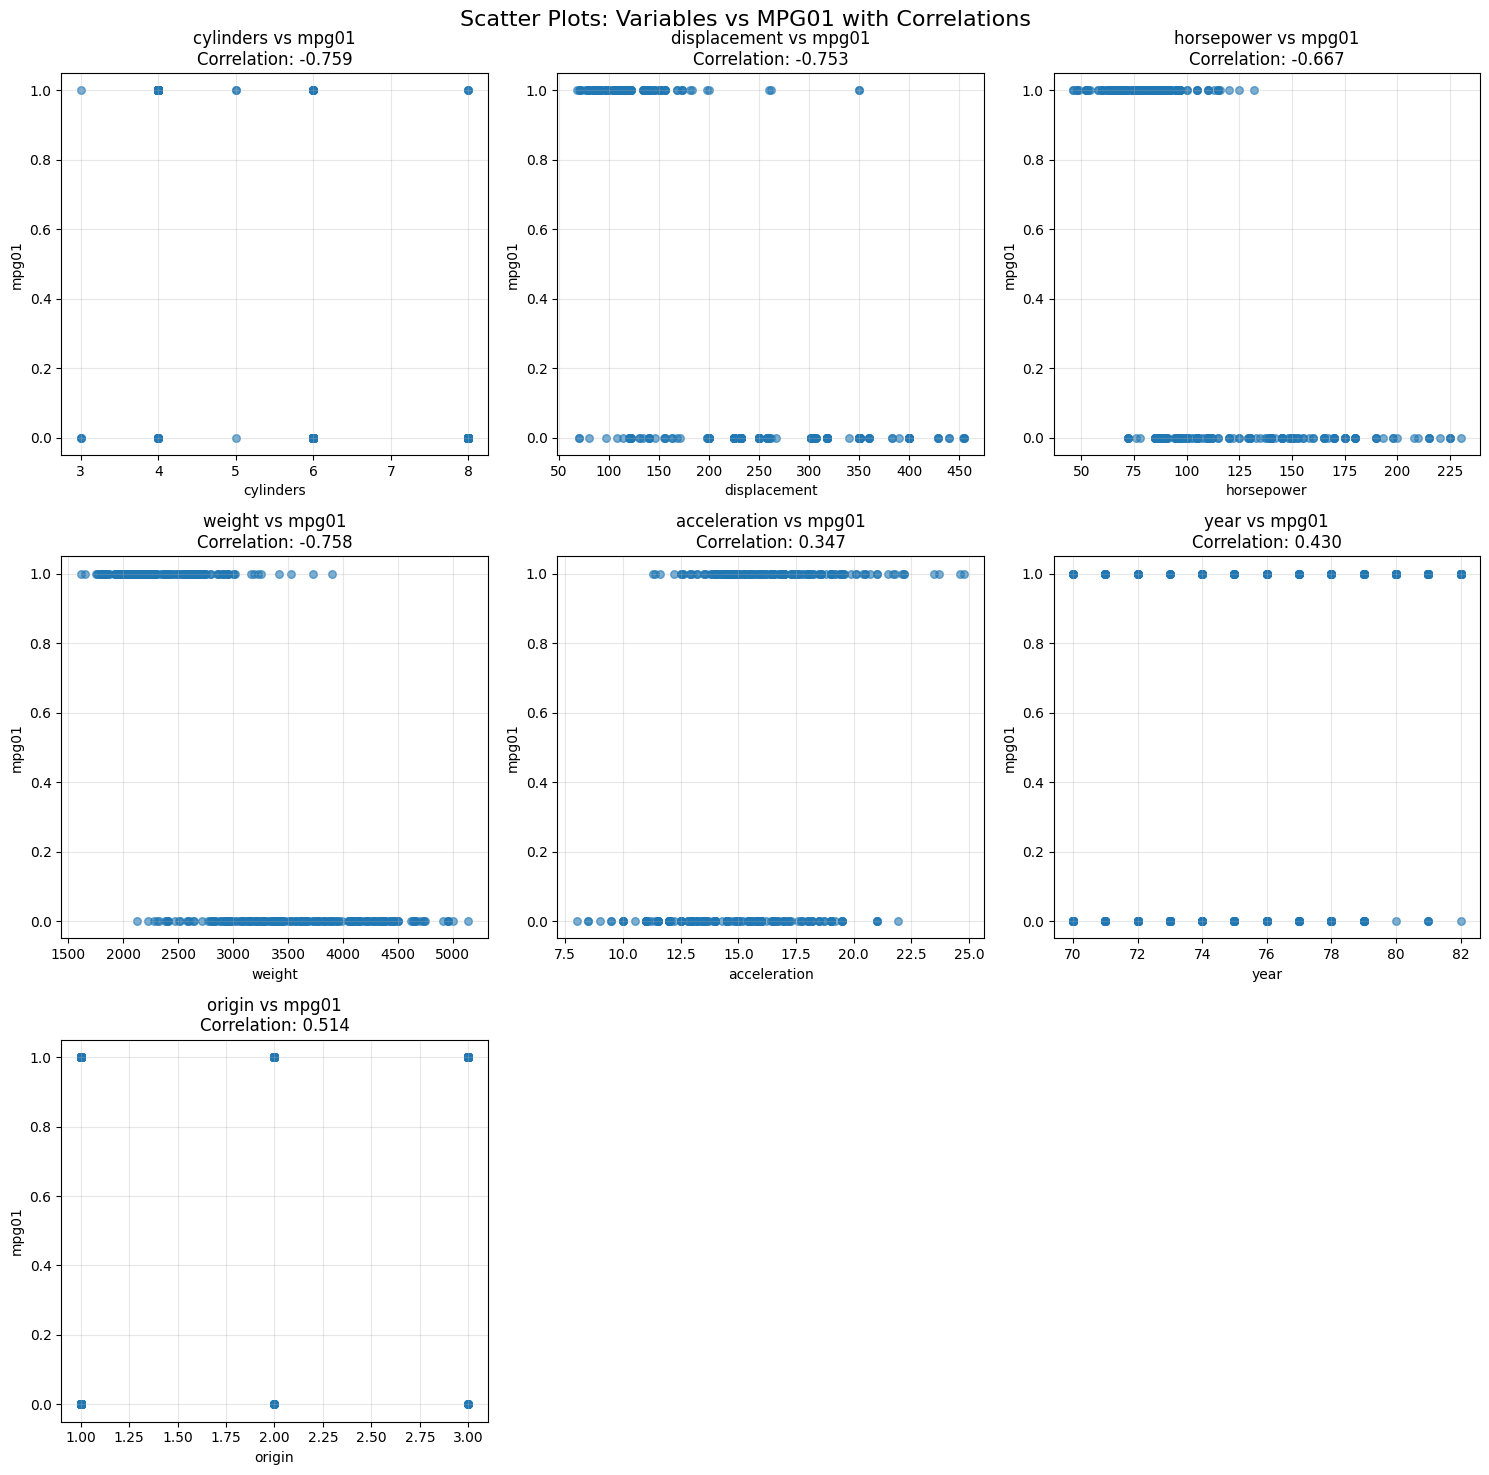

Correlation Summary with MPG01:
----------------------------------------
cylinders   :  -0.759
displacement:  -0.753
horsepower  :  -0.667
weight      :  -0.758
acceleration:   0.347
year        :   0.430
origin      :   0.514


In [4]:
# b)
# Ensure 'mpg01' exists
if "mpg01" not in auto.columns:
    auto["mpg01"] = (auto["mpg"] > auto["mpg"].median()).astype(int)

# Get columns to plot (excluding mpg, name, and mpg01)
plot_cols = [col for col in auto.columns if col not in ["mpg", "name", "mpg01"]]

# Calculate the grid size for subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(plot_cols) + n_cols - 1) // n_cols  # Calculate rows needed

# Create the figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Scatter Plots: Variables vs MPG01 with Correlations', fontsize=16, y=0.98)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()

# Create scatter plots with correlations
for i, col in enumerate(plot_cols):
    ax = axes[i]
    
    # Calculate correlation coefficient
    correlation = auto[col].corr(auto["mpg01"])
    
    # Create scatter plot
    ax.scatter(auto[col], auto["mpg01"], alpha=0.6, s=30)
    ax.set_xlabel(col)
    ax.set_ylabel("mpg01")
    ax.set_title(f"{col} vs mpg01\nCorrelation: {correlation:.3f}")
    ax.grid(True, alpha=0.3)

# Hide any unused subplots
for i in range(len(plot_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Print correlation summary
print("Correlation Summary with MPG01:")
print("-" * 40)
for col in plot_cols:
    correlation = auto[col].corr(auto["mpg01"])
    print(f"{col:<12}: {correlation:>7.3f}")

C:\Users\User\AppData\Local\Temp\ipykernel_1148\2068856592.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(data_for_boxplot, labels=['Low MPG (0)', 'High MPG (1)'], patch_artist=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1148\2068856592.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(data_for_boxplot, labels=['Low MPG (0)', 'High MPG (1)'], patch_artist=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1148\2068856592.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(data_for_boxplot, labels=['Low MPG (0)', 'High MPG (1)'], patch_artis

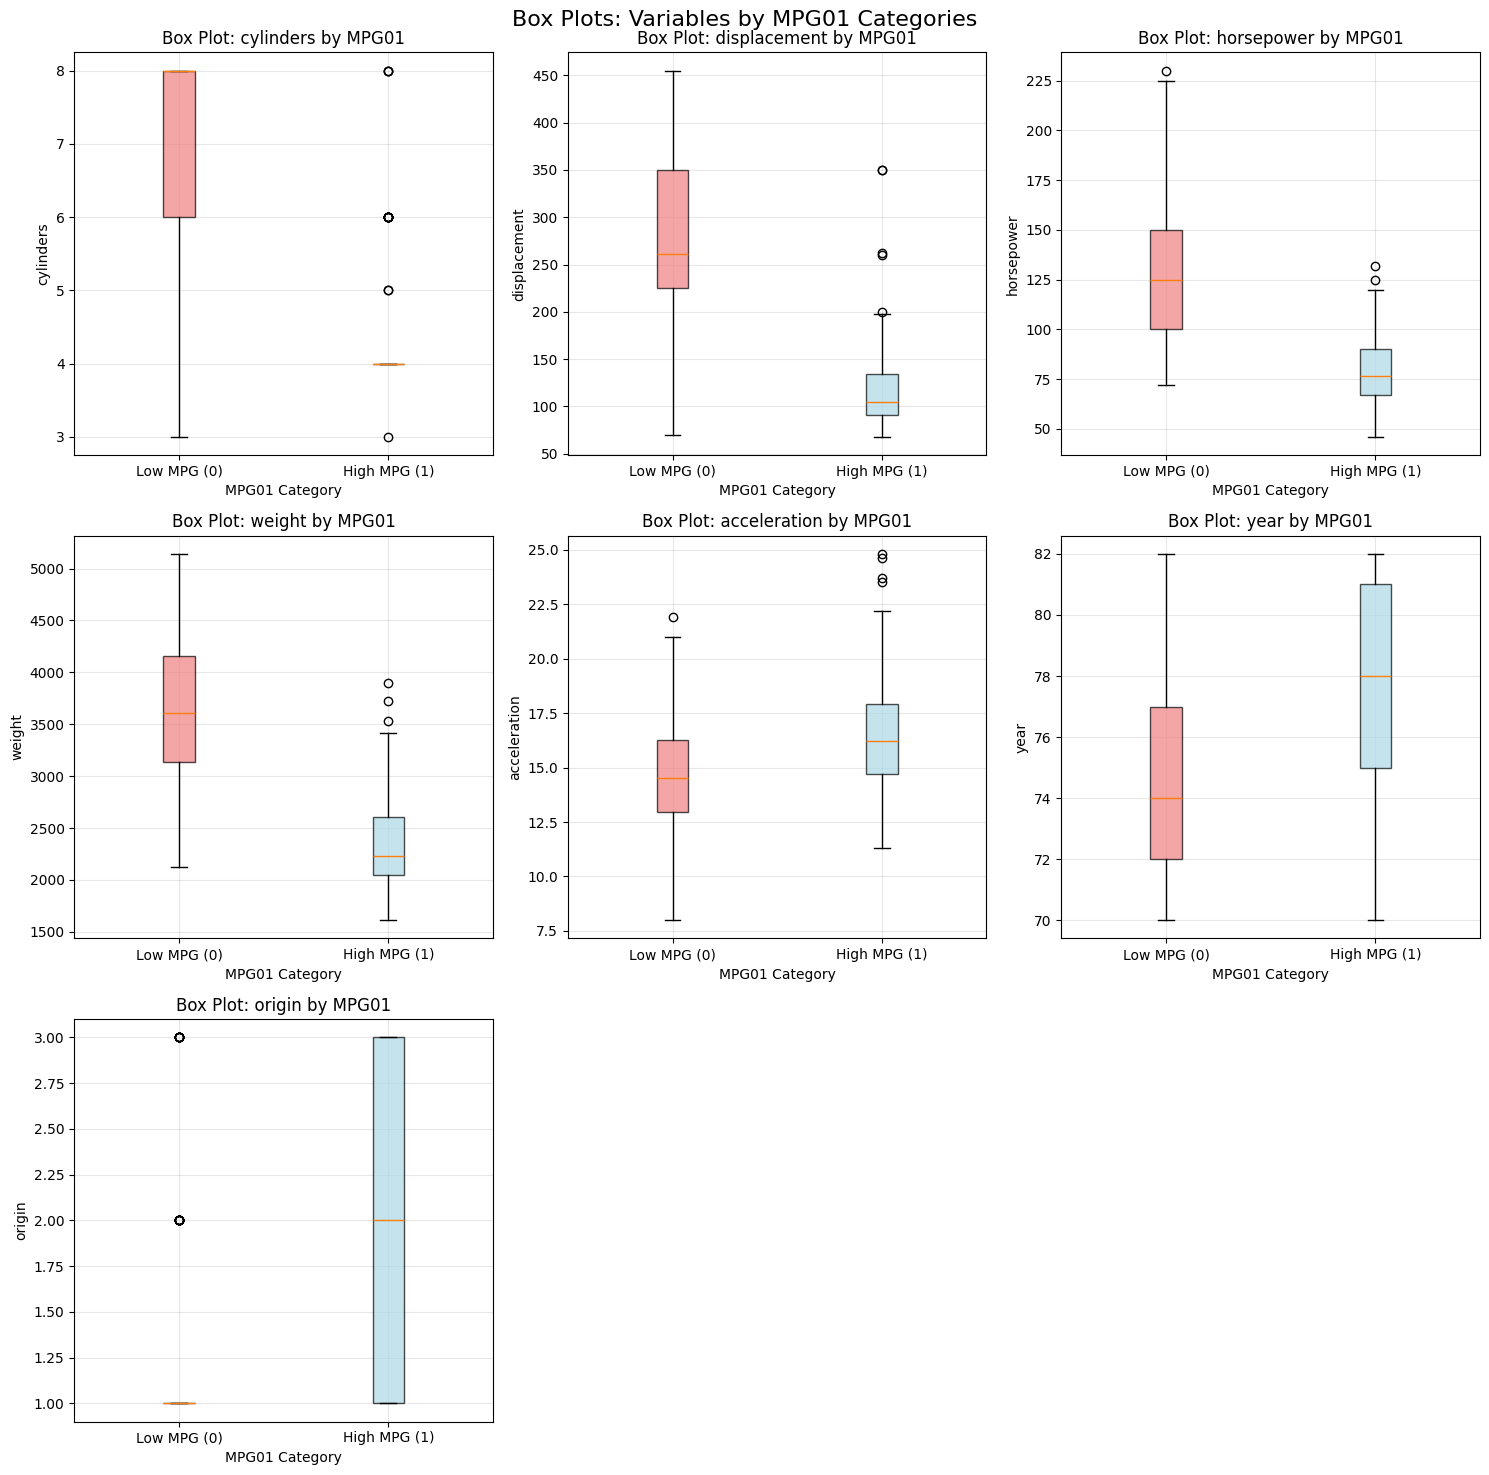

Summary Statistics by MPG01 Groups:

CYLINDERS:
------------------------------
Low MPG (mpg01=0):
count    196.000
mean       6.765
std        1.420
min        3.000
25%        6.000
50%        8.000
75%        8.000
max        8.000
Name: cylinders, dtype: float64

High MPG (mpg01=1):
count    196.000
mean       4.179
std        0.675
min        3.000
25%        4.000
50%        4.000
75%        4.000
max        8.000
Name: cylinders, dtype: float64

DISPLACEMENT:
------------------------------
Low MPG (mpg01=0):
count    196.000
mean     273.158
std       89.524
min       70.000
25%      225.000
50%      261.000
75%      350.000
max      455.000
Name: displacement, dtype: float64

High MPG (mpg01=1):
count    196.000
mean     115.666
std       38.430
min       68.000
25%       91.000
50%      105.000
75%      134.000
max      350.000
Name: displacement, dtype: float64

HORSEPOWER:
------------------------------
Low MPG (mpg01=0):
count    196.000
mean     130.112
std       37.356
min

In [5]:
# Box plots for variables vs MPG01
# Ensure 'mpg01' exists
if "mpg01" not in auto.columns:
    auto["mpg01"] = (auto["mpg"] > auto["mpg"].median()).astype(int)

# Get columns to plot (excluding mpg, name, and mpg01)
plot_cols = [col for col in auto.columns if col not in ["mpg", "name", "mpg01"]]

# Calculate the grid size for subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(plot_cols) + n_cols - 1) // n_cols  # Calculate rows needed

# Create the figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Box Plots: Variables by MPG01 Categories', fontsize=16, y=0.98)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()

# Create box plots
for i, col in enumerate(plot_cols):
    ax = axes[i]
    
    # Prepare data for box plot
    data_for_boxplot = [auto[auto['mpg01'] == 0][col].dropna(), 
                        auto[auto['mpg01'] == 1][col].dropna()]
    
    # Create box plot
    box_plot = ax.boxplot(data_for_boxplot, labels=['Low MPG (0)', 'High MPG (1)'], patch_artist=True)
    
    # Customize colors
    colors = ['lightcoral', 'lightblue']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_xlabel('MPG01 Category')
    ax.set_ylabel(col)
    ax.set_title(f'Box Plot: {col} by MPG01')
    ax.grid(True, alpha=0.3)

# Hide any unused subplots
for i in range(len(plot_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary statistics by mpg01 groups
print("Summary Statistics by MPG01 Groups:")
print("=" * 50)
for col in plot_cols:
    print(f"\n{col.upper()}:")
    print("-" * 30)
    print("Low MPG (mpg01=0):")
    print(auto[auto['mpg01'] == 0][col].describe().round(3))
    print("\nHigh MPG (mpg01=1):")
    print(auto[auto['mpg01'] == 1][col].describe().round(3))

Cylinders, displacement, weight, and horsepower seem to have the strongest correlation with mpg01 (absolute correlation values above 0.65), they seem to be the most useful predictors. Although the other 3 variables have a lower correlation, they may still be useful in predicting mpg01, since they also have some degree of correlation.

In [5]:
# c)

#  Split the data into a 70% training set and a 30% test set.

X_train, X_test, y_train, y_test = train_test_split(
    auto.drop(columns=["mpg", "name", "mpg01"]),
    auto["mpg01"],
    test_size=0.3,
    random_state=42
)


In [6]:
# d)

X_train, X_test, y_train, y_test = train_test_split(
    auto.drop(columns=["mpg", "name", "mpg01", "origin", "acceleration", "year"]),
    auto["mpg01"],
    test_size=0.3,
    random_state=42
)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

# Calculate test error

# Test accuracy
lda_accuracy = accuracy_score(y_test, lda_pred)
lda_error = 1 - lda_accuracy

print("LDA Model Performance:")
print("=" * 30)
print(f"Test Accuracy: {lda_accuracy:.4f}")
print(f"Test Error Rate: {lda_error:.4f} ({lda_error*100:.2f}%)")
print()

# Confusion Matrix
print("Confusion Matrix:")
lda_cm = confusion_matrix(y_test, lda_pred)
print(lda_cm)
print()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, lda_pred))

LDA Model Performance:
Test Accuracy: 0.8644
Test Error Rate: 0.1356 (13.56%)

Confusion Matrix:
[[51 14]
 [ 2 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86        65
           1       0.78      0.96      0.86        53

    accuracy                           0.86       118
   macro avg       0.87      0.87      0.86       118
weighted avg       0.88      0.86      0.86       118



In [7]:
# e)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
# Calculate test error
# Test accuracy
qda_accuracy = accuracy_score(y_test, qda_pred)
qda_error = 1 - qda_accuracy    
print("QDA Model Performance:")
print("=" * 30)
print(f"Test Accuracy: {qda_accuracy:.4f}")
print(f"Test Error Rate: {qda_error:.4f} ({qda_error*100:.2f}%)")
print()
# Confusion Matrix
print("Confusion Matrix:")
qda_cm = confusion_matrix(y_test, qda_pred)
print(qda_cm)
print()
# Classification Report
print("Classification Report:")
print(classification_report(y_test, qda_pred))


QDA Model Performance:
Test Accuracy: 0.8559
Test Error Rate: 0.1441 (14.41%)

Confusion Matrix:
[[51 14]
 [ 3 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.86        65
           1       0.78      0.94      0.85        53

    accuracy                           0.86       118
   macro avg       0.86      0.86      0.86       118
weighted avg       0.87      0.86      0.86       118



In [8]:
# f)

logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
logit_pred = (logit_model.predict(sm.add_constant(X_test)) >= 0.5).astype(int)
# Calculate test error
logit_accuracy = accuracy_score(y_test, logit_pred)
logit_error = 1 - logit_accuracy
print("Logistic Regression Model Performance:")
print("=" * 30)
print(f"Test Accuracy: {logit_accuracy:.4f}")
print(f"Test Error Rate: {logit_error:.4f} ({logit_error*100:.2f}%)")
print()
# Confusion Matrix
print("Confusion Matrix:")
logit_cm = confusion_matrix(y_test, logit_pred)
print(logit_cm)
print()
# Classification Report
print("Classification Report:")
print(classification_report(y_test, logit_pred))


Optimization terminated successfully.
         Current function value: 0.244742
         Iterations 9
Logistic Regression Model Performance:
Test Accuracy: 0.8644
Test Error Rate: 0.1356 (13.56%)

Confusion Matrix:
[[51 14]
 [ 2 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86        65
           1       0.78      0.96      0.86        53

    accuracy                           0.86       118
   macro avg       0.87      0.87      0.86       118
weighted avg       0.88      0.86      0.86       118



In [9]:
# g)

NBC = GaussianNB()
NBC.fit(X_train, y_train)
nbc_pred = NBC.predict(X_test)
# Calculate test error
# Test accuracy
nbc_accuracy = accuracy_score(y_test, nbc_pred)
nbc_error = 1 - nbc_accuracy
print("NBC Model Performance:")
print("=" * 30)
print(f"Test Accuracy: {nbc_accuracy:.4f}")
print(f"Test Error Rate: {nbc_error:.4f} ({nbc_error*100:.2f}%)")
print()
# Confusion Matrix
print("Confusion Matrix:")
nbc_cm = confusion_matrix(y_test, nbc_pred)
print(nbc_cm)
print()
# Classification Report
print("Classification Report:")
print(classification_report(y_test, nbc_pred))


NBC Model Performance:
Test Accuracy: 0.8644
Test Error Rate: 0.1356 (13.56%)

Confusion Matrix:
[[51 14]
 [ 2 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86        65
           1       0.78      0.96      0.86        53

    accuracy                           0.86       118
   macro avg       0.87      0.87      0.86       118
weighted avg       0.88      0.86      0.86       118



In [10]:
# h)
K = np.array([1,2,3,4,5,10])
knn = KNeighborsClassifier(n_neighbors=K)
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    # Calculate test error
    knn_accuracy = accuracy_score(y_test, knn_pred)
    knn_error = 1 - knn_accuracy
    print(f"KNN Model Performance (K={k}):")
    print("=" * 30)
    print(f"Test Accuracy: {knn_accuracy:.4f}")
    print(f"Test Error Rate: {knn_error:.4f} ({knn_error*100:.2f}%)")
    print()
    # Confusion Matrix
    print("Confusion Matrix:")
    knn_cm = confusion_matrix(y_test, knn_pred)
    print(knn_cm)
    print()
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, knn_pred))


KNN Model Performance (K=1):
Test Accuracy: 0.8475
Test Error Rate: 0.1525 (15.25%)

Confusion Matrix:
[[51 14]
 [ 4 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        65
           1       0.78      0.92      0.84        53

    accuracy                           0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.86      0.85      0.85       118

KNN Model Performance (K=2):
Test Accuracy: 0.8475
Test Error Rate: 0.1525 (15.25%)

Confusion Matrix:
[[54 11]
 [ 7 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        65
           1       0.81      0.87      0.84        53

    accuracy                           0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.85      0.85      0.85       118

KNN Model Performance (K=3):
Test Accuracy: 0.8644
Tes

When K=3, the KNN model performs the best, with a test error rate of 13.56%.

## Chapter 5: Questions 8

In [11]:
# a)

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
data = pd.DataFrame({'x': x, 'y': y})
# Check the dimensions
print("Data Analysis:")
print("=" * 30)
print(f"n (number of observations): {len(x)}")
print(f"p (number of predictors): 1")
print()


Data Analysis:
n (number of observations): 100
p (number of predictors): 1



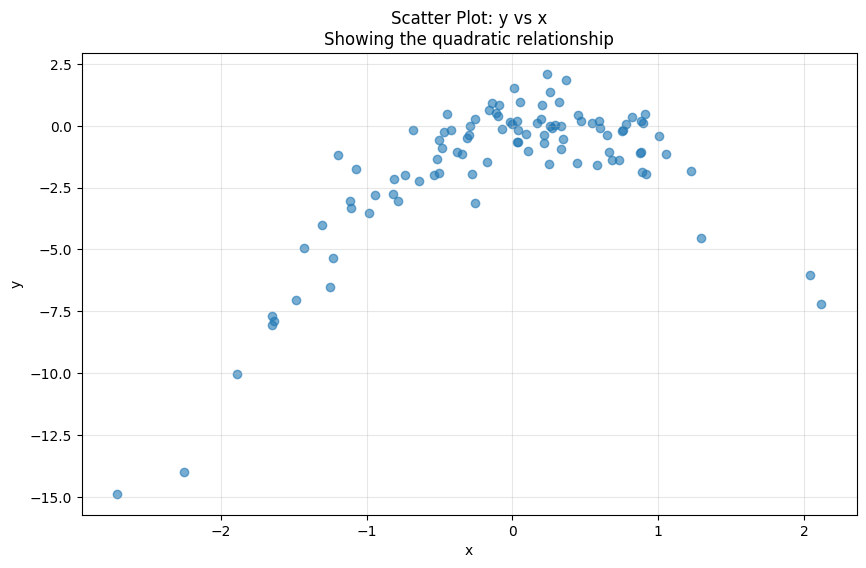

In [12]:
# b)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot: y vs x\nShowing the quadratic relationship')
plt.grid(True, alpha=0.3)
plt.show()

This is a **quadratic relationship** between X and Y. The scatter plot clearly shows the characteristic parabolic (inverted U-shape) pattern due to the $-2X^2$ term.

In [13]:
# c)

from sklearn.model_selection import LeaveOneOut

# Set random seed
np.random.seed(42)

cv_error = np.zeros(4) #array to store CV errors for degrees 1-4
H = np.array(data['x']) #extract x values
M = sklearn_sm(sm.OLS)  #create sklearn-compatible model
Y = data['y']

# Create LOOCV splitter
loocv = LeaveOneOut()

for i, d in enumerate(range(1, 5)): #loop over polynomial degrees 1 to 4
    X = np.power.outer(H, np.arange(d+1)) #create polynomial features
    M_CV = cross_validate(M, 
                          X,
                          Y,
                          cv=loocv,
                          scoring='neg_mean_squared_error') #LOOCV
    cv_error[i] = -np.mean(M_CV['test_score']) #convert to positive MSE
    
print("LOOCV errors for polynomial degrees 1-4:")
for i, error in enumerate(cv_error):
    print(f"Degree {i+1}: {error:.4f}")
    
cv_error #display LOOCV errors for polynomial degrees 1 to 4


LOOCV errors for polynomial degrees 1-4:
Degree 1: 6.6330
Degree 2: 1.1229
Degree 3: 1.3018
Degree 4: 1.3324


array([6.63302984, 1.12293686, 1.30179655, 1.33239427])

In [14]:
# d)

# Set different random seed
np.random.seed(123)  # Different seed from part (c)

cv_error_d = np.zeros(4) #array to store CV errors for degrees 1-4
H = np.array(data['x']) #extract x values (same data as before)
M = sklearn_sm(sm.OLS)  #create sklearn-compatible model
Y = data['y']

# Create LOOCV splitter
loocv = LeaveOneOut()

for i, d in enumerate(range(1, 5)): #loop over polynomial degrees 1 to 4
    X = np.power.outer(H, np.arange(d+1)) #create polynomial features
    M_CV = cross_validate(M, 
                          X,
                          Y,
                          cv=loocv,
                          scoring='neg_mean_squared_error') #LOOCV
    cv_error_d[i] = -np.mean(M_CV['test_score']) #convert to positive MSE
    
print("LOOCV errors with different random seed (seed=123):")
for i, error in enumerate(cv_error_d):
    print(f"Degree {i+1}: {error:.4f}")

print("\nComparison with part (c) results:")
print("=" * 50)
print("Degree | Part (c) seed=42 | Part (d) seed=123 | Difference")
print("-" * 50)
for i in range(4):
    diff = abs(cv_error[i] - cv_error_d[i])
    print(f"   {i+1}   |     {cv_error[i]:.4f}      |     {cv_error_d[i]:.4f}      |   {diff:.6f}")

print(f"\nAre the results the same? {np.allclose(cv_error, cv_error_d)}")

LOOCV errors with different random seed (seed=123):
Degree 1: 6.6330
Degree 2: 1.1229
Degree 3: 1.3018
Degree 4: 1.3324

Comparison with part (c) results:
Degree | Part (c) seed=42 | Part (d) seed=123 | Difference
--------------------------------------------------
   1   |     6.6330      |     6.6330      |   0.000000
   2   |     1.1229      |     1.1229      |   0.000000
   3   |     1.3018      |     1.3018      |   0.000000
   4   |     1.3324      |     1.3324      |   0.000000

Are the results the same? True


Leave-One-Out Cross-Validation doesn't involve any randomness in how it splits the data. It systematically uses each observation as the test set exactly once. And we're using the exact same data that was generated in part (a). The random seed in parts (c) and (d) doesn't change the underlying data. For linear regression (OLS), the model fitting process is deterministic - given the same training data, it will always produce the same coefficients.

# e\)

The second model (quadratic) seems to have a lower test error rate compared to others. This suggests that the quadratic model is more appropriate for this data because the true relationship between X and Y is quadratic.

In [15]:
# f)

for degree in range(1, 5):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(data[['x']])
    model = sm.OLS(data['y'], sm.add_constant(X_poly)).fit()
    print(f"Degree {degree} Model Summary:")
    print(model.summary())

Degree 1 Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           1.04e-09
Time:                        12:16:38   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0

The statistical significance of the coefficients from different polynomial models also come up with the same conclusion. The quadratic model has significant coefficients, while $X^3$ and $X^4$ are non-significant coefficients. The increase of $R^2$ from linear to quadratic is substantial, while the increase from quadratic to cubic and quartic is minimal.

## Chapter 6: Questions 1

* a)

    Best subset selection will have the smallest (or tied for smallest) training RSS.

    Best subset selection considers all possible combinations of k predictors and chooses the one that minimizes training RSS. While forward and backward stepwise selection are more computationally efficient, they may not always find the optimal subset of predictors that minimizes training RSS.

* b)

    It is not necessarily true that the best subset selection will have the smallest test RSS. While best subset selection minimizes training RSS, it may lead to overfitting, especially when $p$ is large relative to $n$. And the stepwised methods may select a "suboptimal" model that generalizes better to unseen data, resulting in a lower test RSS.

* c)

    * i)
        True. The forward stepwise method increases one predictor to the original selected model at a time, so it will always consider the model with $k$ predictors when selecting the model with $k+1$ predictors.

    * ii)
        True. The backward stepwise method starts with all predictors and removes one predictor in the original selected model at a time. So it will always consider the model with $k$ predictors when selecting the model with $k+1$ predictors.

    * iii)
        False. The forward and backward stepwise selection will NOT necessarily select the same model with k predictors.
        For example: Suppose we have predictors {X₁, X₂, X₃, X₄} and want k=2 predictors:

        * Forward stepwise might select: {X₁, X₃}

            Step 1: X₁ is best single predictor
        
            Step 2: X₃ is best addition to X₁
        
        * Backward stepwise might select: {X₂, X₄}

            Step 1: X₃ is worst predictor when all are included → remove X₃
        
            Step 2: X₁ is worst among remaining → remove X₁

    * iv)
        False. Reason is the same as iii).

    * v)
        False. The best subset selection considers all possible combinations of $k$ predictors and selects the one that minimizes the training RSS. But the selection of the best subset with $k$ predictors does not guarantee that it will be a subset of the best subset with $k+1$ predictors. 
        For example: Suppose we have predictors {X₁, X₂, X₃, X₄} and want k=2 and k=3 predictors:
        * Best subset for k=2 might be: {X₁, X₂}

            This combination gives the lowest training RSS among all pairs.
            
        * Best subset for k=3 might be: {X₂, X₃, X₄}
            This combination gives the lowest training RSS among all triplets, which does not include X₁.

## Chapter 6: Questions 2

* a)

    iii)
    Lasso is a shrinkage method that sacrifices unbiasedness by introducing bias into the estimates in exchange for a reduction in variance. This trade-off can lead to a lower overall test MSE, especially when dealing with high-dimensional data or multicollinearity among predictors. And the $L_1$ penalty in Lasso can set some coefficients exactly to zero, this constraint makes the model simpler and therefore less flexible.
 

* b)

    iii)
    Reason is pretty much the same as in part a), but the Ridge penalty is $L_2$ and it does not set coefficients exactly to zero. Instead, it shrinks them towards zero, which can be beneficial in situations with high multicollinearity.

* c)   

    ii)
    Non-linear methods are more flexible than least squares. And a non-linear model improves upon a linear model when the data warrants it. The improvement in prediction accuracy occurs when the tradeoff is favorable—that is, when the substantial decrease in bias (from correctly modeling a complex relationship) is greater than the accompanying increase in variance. If the true relationship is actually linear, using a more flexible non-linear model will needlessly increase variance without any benefit, leading to worse performance.